<a href="https://colab.research.google.com/github/tsato-code/colab_notebooks/blob/master/lightgbm_shap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install shap

     |████████████████████████████████| 358kB 6.7MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491633 sha256=ced8fc345f16c21aab60c279049e971e6c7ecc677a1e5434647eaad45d2e8ee3
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [2]:
%matplotlib inline

import lightgbm as lgb
import shap
from sklearn.model_selection import train_test_split

shap.initjs()

In [3]:
#データセット読込
train_x, train_y = shap.datasets.boston()

# データセットの分割
tr_x, val_x, tr_y, val_y = train_test_split(train_x, train_y, shuffle=True, random_state=42)

# lightgbmデータセット
lgb_train = lgb.Dataset(tr_x, tr_y)
lgb_val = lgb.Dataset(val_x, val_y, reference=lgb_train)

# ハイパーパラメータ設定
lgbm_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'verbose': -1
}

booster = lgb.train(
    lgbm_params,
    lgb_train,
    valid_sets=lgb_val,
    num_boost_round=1000,
    early_stopping_rounds=100,
    verbose_eval=50
)

# SHAPオブジェクト
explainer = shap.TreeExplainer(booster, data=tr_x)

# モデル解釈
tr_x_shap_values = explainer.shap_values(tr_x)

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 3.41701
[100]	valid_0's rmse: 3.30722
[150]	valid_0's rmse: 3.24115
[200]	valid_0's rmse: 3.22073
[250]	valid_0's rmse: 3.2121
[300]	valid_0's rmse: 3.21216
[350]	valid_0's rmse: 3.21811
Early stopping, best iteration is:
[271]	valid_0's rmse: 3.20437


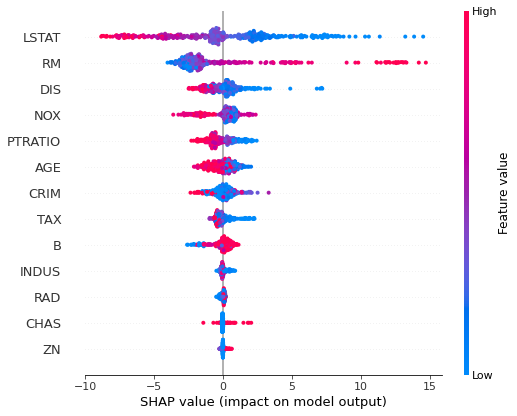

In [4]:
# SHAP value 可視化
shap.summary_plot(
    shap_values=tr_x_shap_values,
    features=tr_x,
    feature_names=tr_x.columns
)

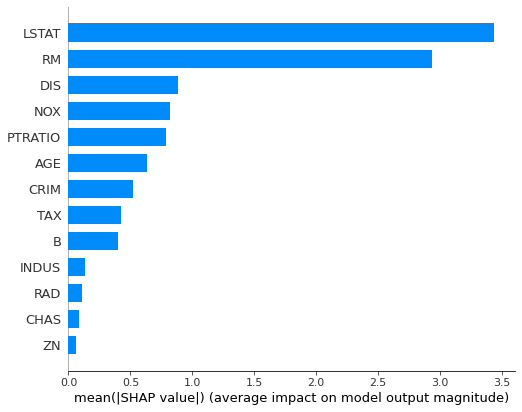

In [5]:
# 特徴量の重要度
shap.summary_plot(
    shap_values=tr_x_shap_values,
    features=tr_x,
    feature_names=tr_x.columns,
    plot_type='bar'
)

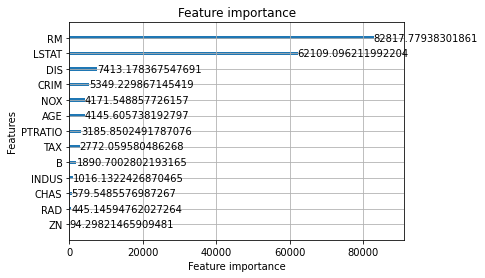

In [6]:
lgb.plot_importance(booster, importance_type='gain')

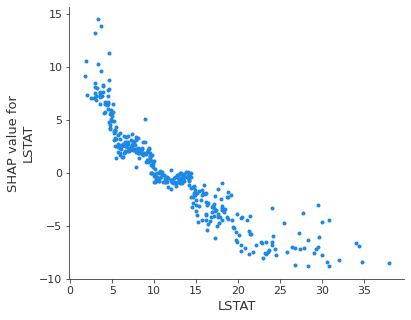

In [7]:
# Dependence plot
shap.dependence_plot(
    ind='LSTAT',
    interaction_index=None,
    shap_values=tr_x_shap_values,
    features=tr_x,
    feature_names=tr_x.columns
)

LSTATが大きいほどSHAP valueも高い。

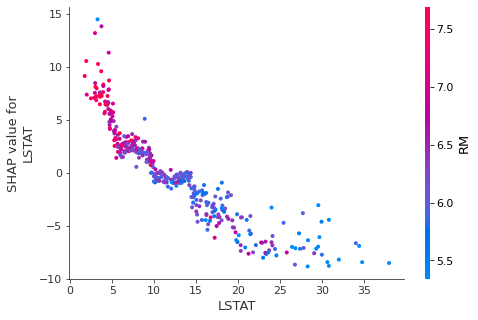

In [8]:
# Dependence plot
# interation_indexに別の特徴量を指定した場合
shap.dependence_plot(
    ind='LSTAT',
    interaction_index='RM',
    shap_values=tr_x_shap_values,
    features=tr_x,
    feature_names=tr_x.columns
)

LSTATが高くなると住居の平均的な部屋数も減る傾向がある

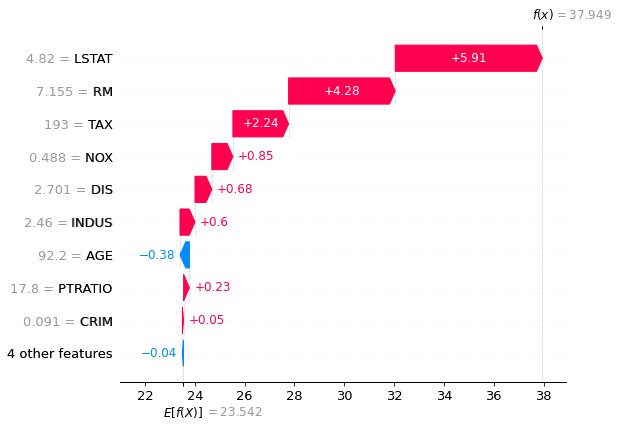

In [21]:
# waterfall plot
shap.plots._waterfall.waterfall_legacy(
    expected_value=explainer.expected_value,
    shap_values=tr_x_shap_values[0],
    features=tr_x.iloc[0],
    feature_names=tr_x.columns
)

In [25]:
func = shap.plots._force.force
func.__code__.co_varnames[:func.__code__.co_argcount]

('base_value',
 'shap_values',
 'features',
 'feature_names',
 'out_names',
 'link',
 'plot_cmap',
 'matplotlib',
 'show',
 'figsize',
 'ordering_keys',
 'ordering_keys_time_format',
 'text_rotation',
 'contribution_threshold')

In [27]:
# Force plot
shap.initjs()
#shap.force_plot(
shap.plots._force.force(
    base_value=explainer.expected_value,
    shap_values=tr_x_shap_values,
    features=tr_x,
    feature_names=tr_x.columns
)

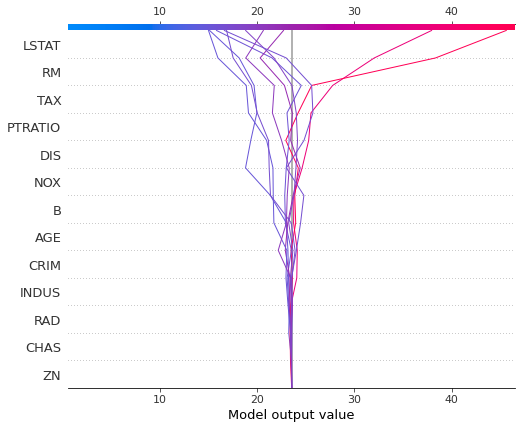

In [28]:
# Decision plot
shap.decision_plot(
    base_value=explainer.expected_value,
    shap_values=tr_x_shap_values[:10],
    features=tr_x.iloc[:10],
    feature_names=list(tr_x.columns)
)